# WeatherPy
----
* Python script to visualize the weather of 500+ random, cities across the world of varying distance from the equator. Utilizing, The python library citipy, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.


# Analysis

*"What's the weather like as we approach the equator?"

* By performing a weather check on more than 600 cities using a series of successive API calls to the openweathermap.org, and ploting the Citi Latitude vs. Max Temperature we can notice that the cities on, or close to the equator did not experience the highest values (temperatures), The highest values are noticeable for the cities located between 20 and 30 degrees latitude, with the city of Guaymas at 27.93 latitude experiencing the the hottest temperature of 99 degrees, followed by the city of Brownwood at 31.71 latitude experiencing the second hottest temperature of 96.8 degrees. 


* The highest temperatures are experienced between latitudes of -10 and 50 degrees, with variability of the temperature increasing as we observe temperatures outside of the range 0 to 20 degrees latitude. The highest consistency is in the latitude range of 10-20 degrees.


* To further analyze, the data was split into Northern and Southern hemisphere and analyzed to find if there is a correlation between Temperature, Humidity, Cloudiness, Wind Speed and latitude. Of the four weather measures, examined versus the latitude the strongest correlation was found between Southern Hemisphere changes in temperature versus latitude, with a moderate linear assosition and r-squared value of 0.60.


* For the rest od the weather parameters, the r-squared value is ranging between 0.00 and 0.09 indicating there is no  correlation  between latitude and Humidity, Cloudines or Wind speed.


* The weather conditions can be impacted by the geographic features and this should be taken into considerations. The local features, like elevation, closenes to big bodyes of water, The Sahafa Desert can have big effect on the weather, regardles of the longitude and this should be noted as a area for further analysis.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


622

### Performing API Calls
* Performing a weather check on each city using a series of successive API calls.
* Printing a log of each city as it's being processed (with the city number and city name).


In [7]:
# Save url information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q="

# Get weather data for all the random cities, generated in the list cities.

# Creating empty lists to store the data
city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudines = []
wind_speed = []
country = []
date = []


print("--------------------------") 
print("Beginning Data Retrieval  ")
print("--------------------------")

# Creating counts
Record_count = 0
myset_count = 1

for city in cities:
    try:

        weather_json = requests.get(query_url + city).json()
#         print(json.dumps(weather_json, indent=4, sort_keys=True))
        city_name.append(weather_json["name"])
        lat.append(weather_json["coord"]["lat"])
        long.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudines.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        Record_count+=1
        print(f"Processing Record {Record_count} of Set {myset_count} | {city}")
#         After 50 requests the program will "sleep" for 60 seconds, so it will not reach the limit of 60 rpm
        if Record_count == 50:
#               time.sleep(1)
              Record_count = 0
              myset_count+=1
                
    except KeyError:
        print("City not found. Skipping...")
              
print("--------------------------")              
print("Data Retrieval Complete")
print("--------------------------")
              


--------------------------
Beginning Data Retrieval  
--------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | deputatskiy
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | nouadhibou
Processing Record 7 of Set 1 | mayo
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | birjand
Processing Record 10 of Set 1 | evanston
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | birin
Processing Record 13 of Set 1 | narsaq
Processing Record 14 of Set 1 | ahuimanu
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | east london
City not found. Skipping...
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | birecik
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | walvis bay
Processing Record 21 of Set 1 | kirakira
Processing Record 22 of Set 1 | iluli

Processing Record 39 of Set 4 | dicabisagan
Processing Record 40 of Set 4 | leningradskiy
Processing Record 41 of Set 4 | lisala
Processing Record 42 of Set 4 | margate
Processing Record 43 of Set 4 | fukue
Processing Record 44 of Set 4 | panaba
Processing Record 45 of Set 4 | seybaplaya
Processing Record 46 of Set 4 | lompoc
Processing Record 47 of Set 4 | paramonga
Processing Record 48 of Set 4 | coquimbo
Processing Record 49 of Set 4 | constitucion
Processing Record 50 of Set 4 | kargil
Processing Record 1 of Set 5 | chimbote
Processing Record 2 of Set 5 | aksarka
Processing Record 3 of Set 5 | vanimo
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | nieves
Processing Record 6 of Set 5 | faanui
Processing Record 7 of Set 5 | san cristobal
Processing Record 8 of Set 5 | popondetta
City not found. Skipping...
Processing Record 9 of Set 5 | kondoros
Processing Record 10 of Set 5 | okhtyrka
Processing Record 11 of Set 5 | ojinaga
Processing Record 12 of Set 5 | balak

Processing Record 25 of Set 8 | saint pete beach
Processing Record 26 of Set 8 | nanakuli
Processing Record 27 of Set 8 | kedrovyy
Processing Record 28 of Set 8 | nikolskiy
Processing Record 29 of Set 8 | sao goncalo do amarante
Processing Record 30 of Set 8 | mbaiki
Processing Record 31 of Set 8 | kahului
Processing Record 32 of Set 8 | port moresby
Processing Record 33 of Set 8 | mettur
Processing Record 34 of Set 8 | praya
Processing Record 35 of Set 8 | la orilla
Processing Record 36 of Set 8 | salinopolis
Processing Record 37 of Set 8 | bima
Processing Record 38 of Set 8 | west bay
Processing Record 39 of Set 8 | sawtell
Processing Record 40 of Set 8 | vaitape
Processing Record 41 of Set 8 | chacarita
Processing Record 42 of Set 8 | george town
Processing Record 43 of Set 8 | dolores
Processing Record 44 of Set 8 | qaqortoq
Processing Record 45 of Set 8 | verkhniye sergi
Processing Record 46 of Set 8 | auki
Processing Record 47 of Set 8 | pasinler
City not found. Skipping...
Proce

Processing Record 17 of Set 12 | mugur-aksy
City not found. Skipping...
Processing Record 18 of Set 12 | itaituba
Processing Record 19 of Set 12 | mbengwi
City not found. Skipping...
--------------------------
Data Retrieval Complete
--------------------------


### Converting The Raw Data to DataFrame


In [8]:
# Creating and displaying the DataFrame
data_df = pd.DataFrame({"City": city_name,
                        "Lat": lat,
                        "Lng": long,
                        "Max Temp": max_temp,
                        "Humidity": humidity,
                        "Cloudiness": cloudines,
                        "Wind Speed": wind_speed,
                        "Country": country,
                        "Date": date})
data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,70.72,71,0,21.99,PF,1597020579
1,Albany,42.60,-73.97,81.00,63,0,4.45,US,1597020579
2,Punta Arenas,-53.15,-70.92,33.80,80,100,16.11,CL,1597020579
3,Deputatsky,69.30,139.90,37.69,95,100,6.33,RU,1597020579
4,Airai,-8.93,125.41,74.05,56,3,0.83,TL,1597020579
...,...,...,...,...,...,...,...,...,...
564,Mandalgovi,45.76,106.27,59.11,57,96,14.79,MN,1597020759
565,Mingoyo,-10.10,39.63,66.20,93,20,6.93,TZ,1597020759
566,Mugur-Aksy,50.35,90.50,54.82,63,100,1.30,RU,1597020759
567,Itaituba,-4.28,-55.98,77.14,49,0,0.20,BR,1597020759


In [9]:
# Exporting the city data into a .csv.
data_df.to_csv(output_data_file)

## Inspecting the data and removing the cities where the humidity > 100%, if there are any.
----

In [10]:
# Sorting the humidity column, so we can visually check if there are cities that have humidity > 100%.
data_df = data_df.sort_values("Humidity", ascending = False)
data_df
# The current data, doesnt have cities with humidity >100%, so this step schould be skipped, 
# however since we are working with random cities, our cities data will change each time we run the script
# so the following code is introduced to ensure consistency
data_df = data_df.loc[data_df["Humidity"]<=100]
data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
11,Birin,26.89,88.07,77.00,100,75,2.24,NP,1597020580
235,Osypenko,46.91,36.83,73.00,100,0,14.00,UA,1597020648
218,Hambantota,6.12,81.12,77.00,100,75,3.36,LK,1597020640
347,Laas,46.62,10.70,55.00,100,20,2.24,IT,1597020683
344,Kunming,25.04,102.72,62.60,100,90,11.18,CN,1597020565
...,...,...,...,...,...,...,...,...,...
167,Tessalit,20.20,1.01,92.19,14,9,9.26,ML,1597020629
68,Kumul,42.80,93.45,86.34,14,100,14.07,CN,1597020599
287,Taoudenni,22.68,-3.98,99.27,13,0,5.39,ML,1597020665
125,Fernley,39.61,-119.25,98.01,8,0,7.14,US,1597020348


In [11]:
# Calculating and printing the potential outliers
quartilles = data_df["Humidity"].quantile([.25,.5,.75]).round(3)
lowerq = quartilles[0.25].round(2)
upperq = quartilles[0.75].round(2)
iqr = round(quartilles[0.75] - quartilles[0.25],2).round(2)
lower_bound = round(quartilles[0.25] - (1.5*iqr),2)
upper_bound = round(quartilles[0.75] + (1.5*iqr),2)
        
print("----------------------")
print(f"The lower quartile is: {lowerq} and the upper quartile is: {upperq}")
print(f"The potential outliers are the values below {lower_bound} and the values above {upper_bound}")
print("----------------------")

----------------------
The lower quartile is: 63.0 and the upper quartile is: 88.0
The potential outliers are the values below 25.5 and the values above 125.5
----------------------


In [12]:
# Makeing a new DataFrame equal to the city data to drop all humidity outliers by index.
otlierindexes = (data_df.loc[(data_df["Humidity"] < lower_bound) | (data_df["Humidity"] > upper_bound)]).index
clean_city_data = data_df.drop(otlierindexes, inplace = False)             
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
11,Birin,26.89,88.07,77.0,100,75,2.24,NP,1597020580
235,Osypenko,46.91,36.83,73.0,100,0,14.00,UA,1597020648
218,Hambantota,6.12,81.12,77.0,100,75,3.36,LK,1597020640
347,Laas,46.62,10.70,55.0,100,20,2.24,IT,1597020683
344,Kunming,25.04,102.72,62.6,100,90,11.18,CN,1597020565
...,...,...,...,...,...,...,...,...,...
113,Adrar,20.50,-10.07,94.3,28,4,13.06,MR,1597020613
58,Alice Springs,-23.70,133.88,60.8,28,0,6.93,AU,1597020403
322,Sūsangerd,31.56,48.18,91.4,27,1,6.93,IR,1597020671
348,Buraidah,26.33,43.98,84.2,26,87,6.93,SA,1597020446


In [13]:
# Extract relevant fields from the data frame
clean_city_data_rel = clean_city_data[["City", 
                                       "Lat", 
                                       "Max Temp", 
                                       "Humidity",
                                       "Cloudiness", 
                                       "Wind Speed"]]
clean_city_data_rel

# Export the City_Data into a csv
output_data_file2 = "../output_data/relevant_cities_data.csv"
clean_city_data_rel.to_csv(output_data_file2)

clean_city_data_rel

,City,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
11,Birin,26.89,77.0,100,75,2.24
235,Osypenko,46.91,73.0,100,0,14.00
218,Hambantota,6.12,77.0,100,75,3.36
347,Laas,46.62,55.0,100,20,2.24
344,Kunming,25.04,62.6,100,90,11.18
...,...,...,...,...,...,...
113,Adrar,20.50,94.3,28,4,13.06
58,Alice Springs,-23.70,60.8,28,0,6.93
322,Sūsangerd,31.56,91.4,27,1,6.93
348,Buraidah,26.33,84.2,26,87,6.93


## Plotting the Data


## Latitude vs. Temperature Plot

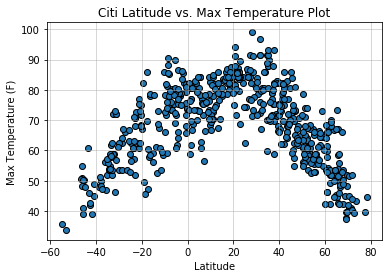

In [14]:
#creating scatter plot from clean_city_data_rel
plt.scatter(
    clean_city_data_rel["Lat"],
    clean_city_data_rel["Max Temp"],
    marker="o",
    edgecolors="black",
    facecolors="#1f77b4")

# Adding x labels, y labels and grid
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Citi Latitude vs. Max Temperature Plot")
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.5)

# Save and show the scatter plot graph
plt.savefig("../output_data/Lat_vs_Temp_plot.png")
plt.show()

## Latitude vs. Humidity Plot

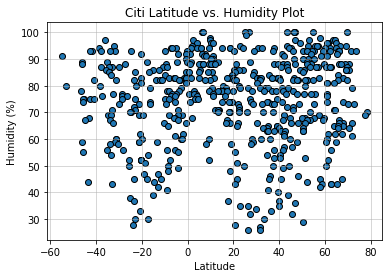

In [15]:
#creating scatter plot from clean_city_data_rel
plt.scatter(
    clean_city_data_rel["Lat"],
    clean_city_data_rel["Humidity"],
    marker="o",
    edgecolors="black",
    facecolors="#1f77b4")

# Adding x labels, y labels and grid
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Citi Latitude vs. Humidity Plot")
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.5)

# Save and show the scatter plot graph
plt.savefig("../output_data/Lat_vs_Humidity_plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

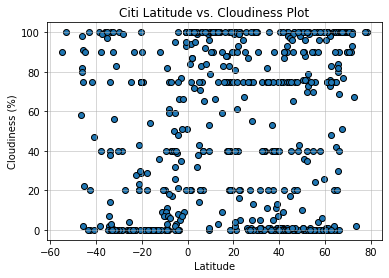

In [16]:
#creating scatter plot from clean_city_data_rel
plt.scatter(
    clean_city_data_rel["Lat"],
    clean_city_data_rel["Cloudiness"],
    marker="o",
    edgecolors="black",
    facecolors="#1f77b4")

# Adding x labels, y labels and grid
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Citi Latitude vs. Cloudiness Plot")
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.5)

# Save and show the scatter plot graph
plt.savefig("../output_data/Lat_vs_Cloudiness_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

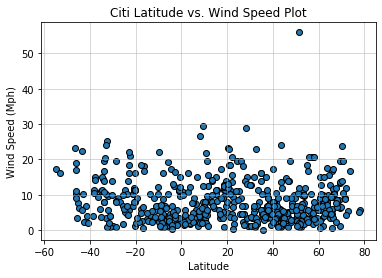

In [17]:
#creating scatter plot from clean_city_data_rel
plt.scatter(
    clean_city_data_rel["Lat"],
    clean_city_data_rel["Wind Speed"],
    marker="o",
    edgecolors="black",
    facecolors="#1f77b4")

# Adding x labels, y labels and grid
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Mph)")
plt.title("Citi Latitude vs. Wind Speed Plot")
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.5)

# Save and show the scatter plot graph
plt.savefig("../output_data/Lat_vs_Wind_Speed_plot.png")
plt.show()

## Linear Regression

In [18]:
# Creating Northern and Southern Hemisphere DataFrames, based on the Lat value
northern_hemisphere_df=clean_city_data_rel.loc[clean_city_data_rel["Lat"] >= 0]
southern_hemisphere_df=clean_city_data_rel.loc[clean_city_data_rel["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4834825988286806


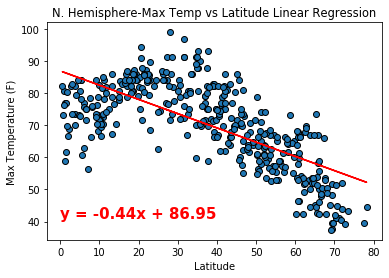

In [19]:
# Creating a function to create Linear Regression plots 

def LinearRegresion(x_values,y_values):
    # Adding the linear regression equation and line to the plot, 
    # and printing out the r-squared value along with the plot
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(60,60),fontsize=15,color="r", xycoords = "figure points", fontweight = "bold")
    plt.scatter(x_values,y_values, edgecolors="black")
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    
    
# Calling the function
LinearRegresion(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"])

# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("N. Hemisphere-Max Temp vs Latitude Linear Regression", size = 11.5)

# Save and show the scatter plot graph
plt.savefig("../output_data/NH_Lat_vs_Temp_regresion.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6059688738375256


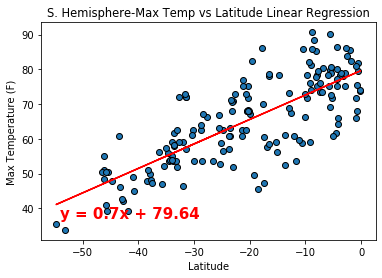

In [20]:
  
# Calling the function
LinearRegresion(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"])

# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("S. Hemisphere-Max Temp vs Latitude Linear Regression", size = 11.5)


# Save and show the scatter plot graph
plt.savefig("../output_data/SH_Lat_vs_Temp_regresion.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0037489715094446044


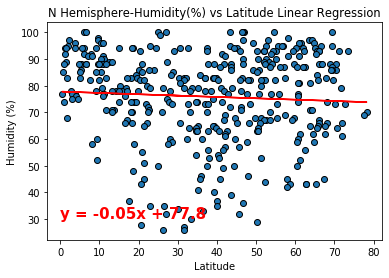

In [21]:
# Calling the function
LinearRegresion(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"])

# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("N Hemisphere-Humidity(%) vs Latitude Linear Regression", size = 11.5)

# Save and show the scatter plot graph
plt.savefig("../output_data/NH_Lat_vs_Humidity_regresion.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0015937445929479653


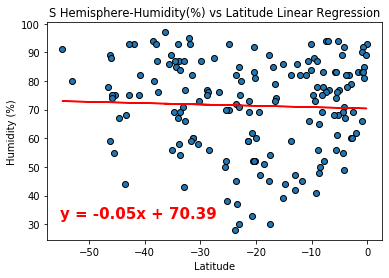

In [22]:
# Calling the function
LinearRegresion(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"])

# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("S Hemisphere-Humidity(%) vs Latitude Linear Regression", size = 11.5)

# Save and show the scatter plot graph
plt.savefig("../output_data/SH_Lat_vs_Humidity_regresion.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00339223546805235


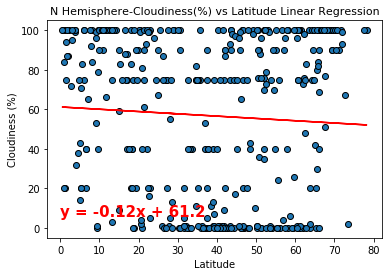

In [23]:
# Calling the function
LinearRegresion(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"])

# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("N Hemisphere-Cloudiness(%) vs Latitude Linear Regression", size = 11.0)

# Save and show the scatter plot graph
plt.savefig("../output_data/NH_Lat_vs_Cloudiness_regresion.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012148388521699329


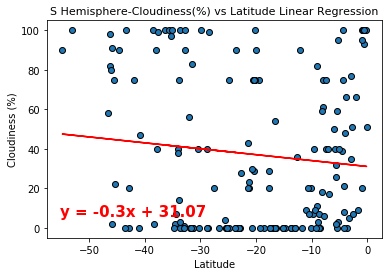

In [24]:
# Calling the function
LinearRegresion(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"])

# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("S Hemisphere-Cloudiness(%) vs Latitude Linear Regression", size = 11.0)

# Save and show the scatter plot graph
plt.savefig("../output_data/SH_Lat_vs_Cloudiness_regresion.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0003991571652354041


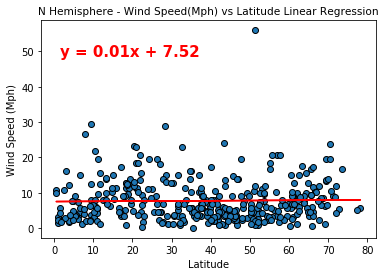

In [25]:

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]

# Adding the linear regression equation and line to the plot, 
# and printing out the r-squared value along with the plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(60,220),fontsize=15,color="r", xycoords = "figure points", fontweight = "bold")
plt.scatter(x_values,y_values, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")





# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Mph)")
plt.title("N Hemisphere - Wind Speed(Mph) vs Latitude Linear Regression", size = 10.5)

# Save and show the scatter plot graph
plt.savefig("../output_data/NH_Lat_vs_Wind Speed_regresion.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09403480708851047


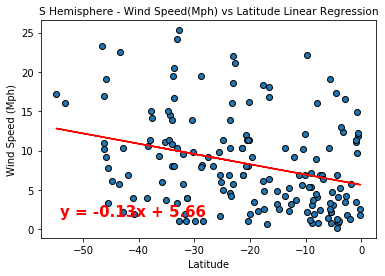

In [26]:
# Calling the function
LinearRegresion(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"])

# Adding x and y labels 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Mph)")
plt.title("S Hemisphere - Wind Speed(Mph) vs Latitude Linear Regression", size = 10.5)

# Save and show the scatter plot graph
plt.savefig("../output_data/SH_Lat_vs_Wind Speed_regresion.png")
plt.show()